In [1]:
import os
import pickle
from glob import glob
import numpy as np
import torch
import pandas as pd
from fsl.data.image import Image
from fsl.utils.image.resample import resampleToPixdims
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

In [2]:
path = 'tractsNormSummed.pkl'
data = pd.read_pickle(path)
data.head()

,min,max,mean,med,std,1p,25p,75p,99p,norm99p
23425368,0.0,0.252836,0.000457,0.0,0.003466,0.0,0.0,0.0,0.011960,26.194116
22943860,0.0,0.229311,0.000461,0.0,0.003602,0.0,0.0,0.0,0.011936,25.903666
24837551,0.0,0.313965,0.000460,0.0,0.003523,0.0,0.0,0.0,0.011611,25.236539
25243303,0.0,0.259715,0.000462,0.0,0.003505,0.0,0.0,0.0,0.011777,25.467852
31722154,0.0,0.325901,0.000464,0.0,0.003636,0.0,0.0,0.0,0.011576,24.951907


In [3]:
def get_array(df,col):
    return df.loc[:][col].values

def stats_calc(df,col):
    arr = get_array(df,col)
    return np.min(arr), np.max(arr), np.mean(arr), np.median(arr), np.std(arr)

def plot_hist(df, col, title=None):
    array = get_array(df, col)
    fig, ax = plt.subplots(1,1,figsize=(8,6))
    ax.grid(axis='y', alpha = 0.75, b=True, which='major', linestyle='-')
    ax.hist(array, bins=50, color='blue', alpha=0.7, rwidth=0.85)
    ax.set_xlabel('Value')
    ax.set_ylabel('Frequency')
#     plt.title(title)
    fig.patch.set_facecolor('xkcd:white')
    _,_,mean,_,std = stats_calc(df, col)
    if col == 'min':
        thr = mean - 2 * std
    elif col=='max':
        thr = mean + 2 * std
    if col == 'min' or col =='max':
        ax.axvline(x=thr, color='r', linestyle='dashed', linewidth=2)
    else:
        ax.axvline(x=mean, color='r', linestyle='dashed', linewidth=2)
    plt.savefig(title+'_'+col+'_Hist'+'.png', dpi=300, bbox_inches="tight")
    # plt.savefig(title+'_'+col+'_Hist'+'.png', dpi=300, facecolor='none', bbox_inches="tight")

def plot_bars(df, labels_list, title=None):
    array_list = get_array(df,labels_list)
#     fig = plt.figure(figsize=(8,6))
    fig, ax = plt.subplots(figsize=(8,6))
#     ax.set_title(title)
    ax.grid(axis='y', alpha = 0.75)
    ax.boxplot(array_list)
    ax.set_xticklabels(labels_list)
    # ax.set_xticklabels(['0', '1', '2','3','4','5', '25', '50', '75','95', '96', '97','98','99', '100'])
    plt.xlabel('Percentile')
    plt.ylabel('Values')
    plt.grid(axis='y', alpha = 0.75)
    fig.patch.set_facecolor('xkcd:white')
    # plt.savefig(title+'_'+'_Bar'+'.png', dpi=300, facecolor='none', bbox_inches="tight")
    plt.savefig(title+'_'+'_Bar'+'.png', dpi=300, bbox_inches="tight")
    # plt.savefig(title+' UKBB'+'.png')

In [4]:
print('Stats (min, max, mean, med, std) for MIN: ', stats_calc(data, 'min'))
print('Stats (min, max, mean, med, std) for MAX: ', stats_calc(data, 'max'))
print('Stats (min, max, mean, med, std) for NORM99p: ', stats_calc(data, 'norm99p'))

Stats (min, max, mean, med, std) for MIN:  (0.0, 0.0, 0.0, 0.0, 0.0)
Stats (min, max, mean, med, std) for MAX:  (0.15466317534446716, 1.068709373474121, 0.2879493586733636, 0.2781863510608673, 0.06224188723094445)
Stats (min, max, mean, med, std) for NORM99p:  (0.0, 28.184742965698234, 25.4769901458824, 25.468380603790227, 0.5581695671551649)


In [5]:
_,_,mean,_,std = stats_calc(data, 'min')
print(mean-2*std)
_,_,mean,_,std = stats_calc(data, 'max')
print(mean+2*std)

0.0
0.4124331331352525


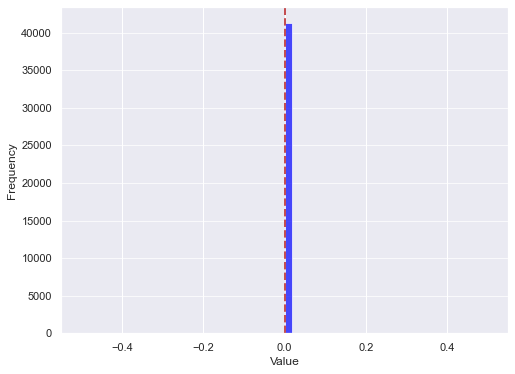

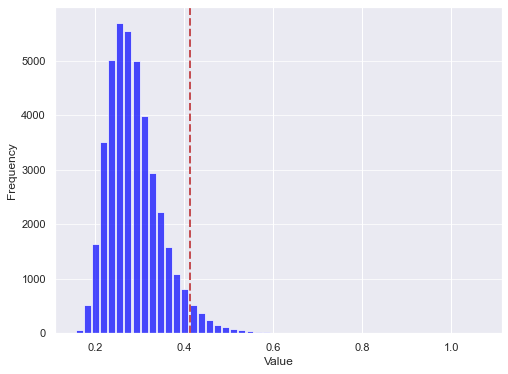

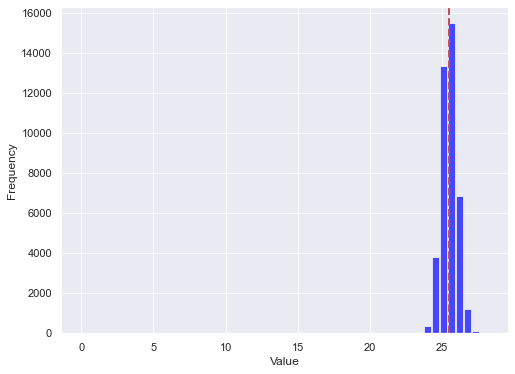

In [6]:
plot_hist(data, 'min', title='tractsNormSummed_Min_Value_Distribution')
plot_hist(data, 'max', title='tractsNormSummed_Value_Distribution')
plot_hist(data, 'norm99p', title='tractsNormSummed_norm99p_Value_Distribution')

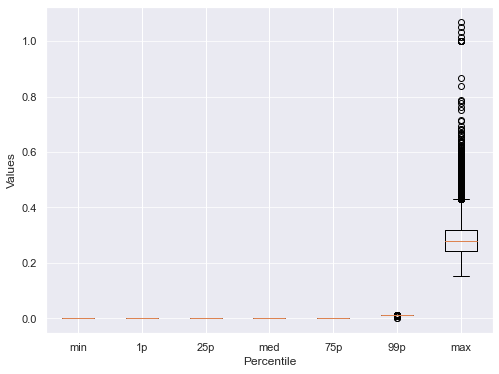

In [7]:
plot_bars(data, ['min', '1p', '25p', 'med', '75p','99p', 'max'], 'tractsNormSummed_Voxel_Intensity_Value_Distribution')

In [8]:
data['min_corrected'] = data['min'] / data['mean']
data['max_corrected'] = data['max'] / data['mean']

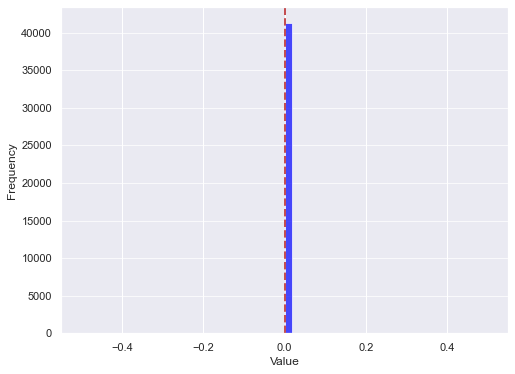

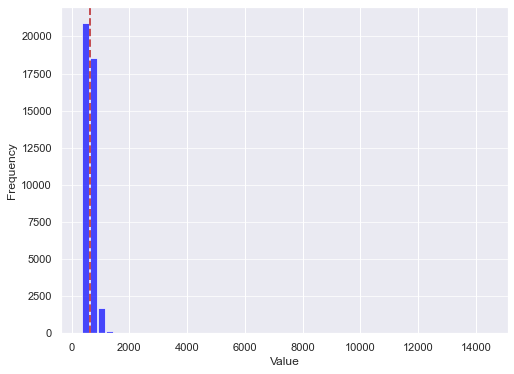

In [9]:
plot_hist(data, 'min_corrected', title='misc')
plot_hist(data, 'max_corrected', title='misc')

In [10]:
data['min_norm'] = data['min_corrected'] / np.mean(data['norm99p'])
data['max_norm'] = data['max_corrected'] / np.mean(data['norm99p'])

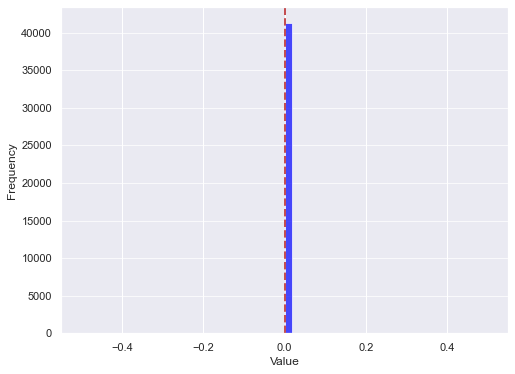

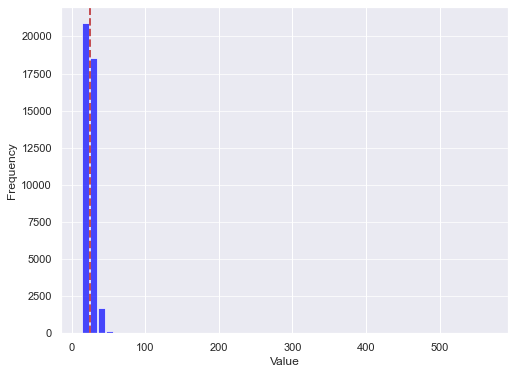

In [11]:
plot_hist(data, 'min_norm', title='misc')
plot_hist(data, 'max_norm', title='misc')

In [18]:
min_scale = data['min'].mean() - data['min'].std()*2
max_scale = data['max'].mean() + data['max'].std()*2
data_scale = max(abs(min_scale), abs(max_scale))
print(data_scale)

data['min_scaled'] = data['min'] / data_scale
data['max_scaled'] = data['max'] / data_scale

0.4124346388811107


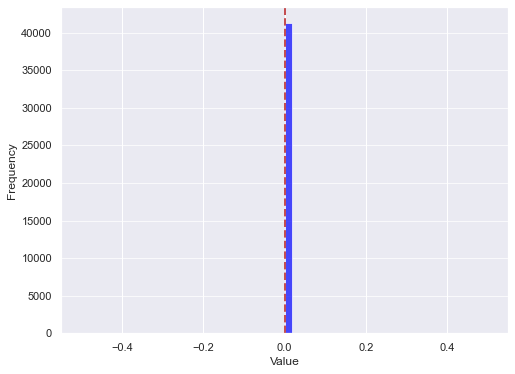

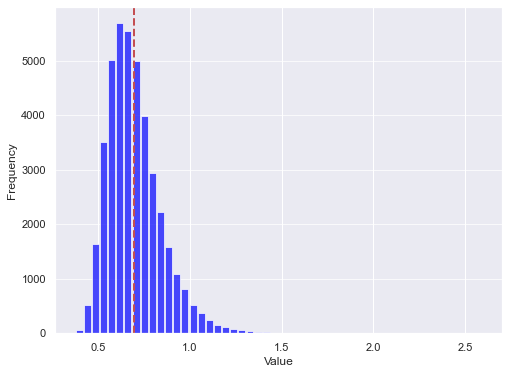

In [17]:
plot_hist(data, 'min_scaled', title='misc')
plot_hist(data, 'max_scaled', title='misc')